In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 80
pd.options.display.max_rows = 81

In [40]:
data = pd.read_csv('train.csv')

In [41]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [42]:
data.shape

(1460, 81)

In [43]:
data.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [44]:
pd.crosstab(data.FireplaceQu, data.Utilities)

Utilities,AllPub,NoSeWa
FireplaceQu,,
Ex,24,0
Fa,33,0
Gd,379,1
Po,20,0
TA,313,0


In [45]:
data['BsmtQual'] = data['BsmtQual'].fillna('TA')
data['BsmtCond'] = data['BsmtCond'].fillna('TA')
data['BsmtCond'] = data['BsmtCond'].fillna('No')
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('Unf')
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('Unf')
data['BsmtExposure'] = data['BsmtExposure'].fillna('No')
data['Electrical'] = data['Electrical'].fillna('SBrkr')
data['FireplaceQu'] = data['FireplaceQu'].fillna('Gd')
data['GarageType'] = data['Electrical'].fillna('Attchd')
data['GarageFinish'] = data['GarageFinish'].fillna('Unf')
data['GarageQual'] = data['GarageQual'].fillna('TA')
data['GarageCond'] = data['GarageCond'].fillna('TA')
data['MasVnrType'] = data['MasVnrType'].fillna('BrkFace')

In [46]:
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean())
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mean())


In [47]:
data.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

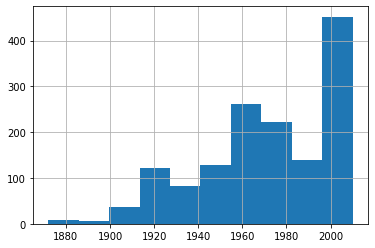

In [48]:
data.YearBuilt.hist()

In [49]:
data['MasVnrType'] = data['MasVnrType'].replace('None','Nothing')

In [50]:
data['MasVnrType'].value_counts()

Nothing    864
BrkFace    453
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [51]:
data['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [52]:
data.drop(['Alley','PoolQC','Fence','MiscFeature'], axis = 1, inplace = True)

In [53]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,SBrkr,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,Nothing,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,SBrkr,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,SBrkr,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,Nothing,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,SBrkr,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,SBrkr,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [54]:
X = data.drop(['SalePrice'], axis = 1)
y = data['SalePrice']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=19)

In [56]:
from catboost import CatBoostRegressor,Pool
from sklearn.metrics import mean_squared_error
# from sklearn import preprocessing
# X = preprocessing.scale(X)

In [57]:
### LINEAR DISCRIMINANT ANALYSIS

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=37)
# X_train = lda.fit_transform(X_train, y_train)
# X_test = lda.transform(X_test)
# explained_variance = lda.explained_variance_ratio_
# print(explained_variance)

In [58]:
cat_index = [2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 34, 38, 39, 40, 41, 52, 54, 56, 57, 59, 62, 63, 64, 74, 75]
cat = CatBoostRegressor(silent=True, iterations=1000, learning_rate=0.01)
cat_model = cat.fit(Pool(X_train,y_train,cat_features = cat_index))
cat_model.score(X_train,y_train)
c_pred = cat_model.predict(X_test)
cat_score = np.sqrt(mean_squared_error(c_pred,y_test))
print("cat: {:.4f}".format(cat_score))

cat: 26714.1371


In [59]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# data['MSZoning'] = le.fit_transform(data['MSZoning'])
# data['Street'] = le.fit_transform(data['Street'])
# data['LotShape'] = le.fit_transform(data['LotShape'])
# data['LandContour'] = le.fit_transform(data['LandContour'])
# data['Utilities'] = le.fit_transform(data['Utilities'])
# data['LotConfig'] = le.fit_transform(data['LotConfig'])
# data['LandSlope'] = le.fit_transform(data['LandSlope'])
# data['BldgType'] = le.fit_transform(data['BldgType'])
# data['HouseStyle'] = le.fit_transform(data['HouseStyle'])
# data['MasVnrType'] = le.fit_transform(data['MasVnrType'])
# data['ExterQual'] = le.fit_transform(data['ExterQual'])
# data['ExterCond'] = le.fit_transform(data['ExterCond'])
# data['Foundation'] = le.fit_transform(data['Foundation'])
# data['BsmtCond'] = le.fit_transform(data['BsmtCond'])
# data['BsmtFinType1'] = le.fit_transform(data['BsmtFinType1'])
# data['HeatingQC'] = le.fit_transform(data['HeatingQC'])
# data['CentralAir'] = le.fit_transform(data['CentralAir'])
# data['Electrical'] = le.fit_transform(data['Electrical'])
# data['CentralAir'] = le.fit_transform(data['CentralAir'])
# data['Functional'] = le.fit_transform(data['Functional'])
# data['GarageType'] = le.fit_transform(data['GarageType'])
# data['GarageQual'] = le.fit_transform(data['GarageQual'])
# data['KitchenQual'] = le.fit_transform(data['KitchenQual'])
# data['SaleType'] = le.fit_transform(data['SaleType'])
# data['SaleCondition'] = le.fit_transform(data['SaleCondition'])


In [60]:
# data['HouseStyle'] = le.fit_transform(data['HouseStyle'])


# data['Condition1'] = le.fit_transform(data['Condition1'])
# data['Condition2'] = le.fit_transform(data['Condition2'])
# data['Condition'] = data['Condition1']*data['Condition2']


# data['YearBuilt'] = le.fit_transform(data['YearBuilt'])
# data['YearRemodAdd'] = le.fit_transform(data['YearRemodAdd'])
# data['Year'] = data['YearRemodAdd']+ data['YearBuilt']


# data['RoofStyle'] = le.fit_transform(data['RoofStyle'])
# data['RoofMatl'] = le.fit_transform(data['RoofMatl'])
# data['Roof'] = data['RoofStyle']*data['RoofMatl']


# data['Exterior1st'] = le.fit_transform(data['Exterior1st'])
# data['Exterior2nd'] = le.fit_transform(data['Exterior2nd'])
# data['Exterior'] = data['Exterior1st'] * data['Exterior2nd']


# data['Basement_Squared_Feet'] = data['TotalBsmtSF'] - data['BsmtUnfSF']



# data['Floor_Squared_Feet'] = data['1stFlrSF'] + data['2ndFlrSF']
# data['Basement_Bathroom'] = data['BsmtFullBath']*data['FullBath'] + data['BsmtHalfBath']*data['HalfBath']

# data['Above_Grade'] = (data['TotRmsAbvGrd'] + data['KitchenAbvGr']) 
# data['FireplaceQu'] = le.fit_transform(data['FireplaceQu'])
# data['Fire'] = data['Fireplaces'] * data['FireplaceQu']
# data['Porch'] = data['OpenPorchSF'] + data['EnclosedPorch']


In [61]:
# data['BsmtFinType1'] = le.fit_transform(data['BsmtFinType1'])
# data['BsmtFinType2'] = le.fit_transform(data['BsmtFinType2'])


In [62]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [63]:
# data.drop(['Alley','BsmtFinType1','Fence','FireplaceQu','Neighborhood','Condition1','Condition2','YearBuilt','YearRemodAdd'], axis =1, inplace = True)
# data.drop(['RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrArea','BsmtQual','BsmtExposure','BsmtFinType2','BsmtFinSF2'], axis =1, inplace = True)
# data.drop(['TotalBsmtSF','BsmtUnfSF','Heating','LowQualFinSF','1stFlrSF','2ndFlrSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'], axis =1, inplace = True)
# data.drop(['BedroomAbvGr','TotRmsAbvGrd','KitchenAbvGr','Fireplaces','GarageYrBlt','GarageCars','GarageFinish','GarageCond','PavedDrive'], axis =1, inplace = True)
# data.drop(['3SsnPorch','BldgType','ScreenPorch','OpenPorchSF','EnclosedPorch','PoolArea','PoolQC','MiscFeature','MiscVal','MoSold'], axis =1, inplace = True)
# data.drop(['Utilities','LotConfig','YrSold'], axis =1, inplace = True)


In [64]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [65]:
data.shape

(1460, 77)

In [66]:
# data.drop('Id',axis=1, inplace = True)

In [67]:
# X = data.drop(['SalePrice'], axis = 1)
# y = data['SalePrice']

In [68]:
# from sklearn.preprocessing import RobustScaler
# scaler= RobustScaler()
# X = scaler.fit_transform(X)
# from sklearn.metrics import mean_squared_error
# from sklearn import preprocessing
# X = preprocessing.scale(X)

In [69]:
# from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
# import sklearn.linear_model as linear_model
# from sklearn.svm import SVR
# from lightgbm import LGBMRegressor
# from sklearn.ensemble import GradientBoostingRegressor

In [70]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=19)

In [71]:
# regressor = SVR(kernel = 'sigmoid')
# reg_model = regressor.fit(X_train,y_train)
# reg_pred = regressor.predict(X_test)
# reg_score = mean_squared_error(reg_pred,y_test)
# print(reg_score)

In [72]:

# from sklearn.decomposition import PCA
# pca = PCA(n_components = 45, whiten = True)
# data = pca.fit_transform(data)

In [73]:
data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000070,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.080187,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,0.036849,0.368392,0.091481,-0.006419,0.180424,0.048258,0.237023,-0.005805,0.320146,0.235755,0.064324,0.269729,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024812,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.518018,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306169,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.780555,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.618130,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,0.114184,0.362452,0.342160,0.174019,-0.069068,0.389893,0.085055,0.026669,0.275730,0.200802,0.102417,-0.037364,0.280027,0.247906,0.249367,0.363778,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.150338,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

## LINEAR DISCRIMINANT ANALYSIS

In [74]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = None)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
# explained_variance = pca.explained_variance_ratio_
# print(explained_variance)

In [75]:
# from sklearn.ensemble import GradientBoostingRegressor
# from catboost import CatBoostRegressor
# from sklearn.model_selection import KFold, cross_val_score

# params = {'n_estimators':1000, 'max_depth':4, 'min_samples_split':4, 'learning_rate': 0.1}
# 
# gbr = GradientBoostingRegressor(**params)
# gbr_model = gbr.fit(X_train,y_train)
# cat = CatBoostRegressor(silent=True, iterations=150, learning_rate=0.06)
# cat_model = cat.fit(X_train,y_train)
# cat_model.score(X_train,y_train)
# c_pred = cat_model.predict(X_test)
# cat_score = mean_squared_error(c_pred,y_test)
# print("cat: {:.4f}".format(cat_score))

# gbr_pred = gbr_model.predict(X_test)

# gbr_score = mean_squared_error(gbr_pred,y_test)

# print("gbr: {:.4f}".format(gbr_score))

In [76]:
# kf = KFold(n_splits=5, random_state=42, shuffle=False)
# def cv_rmse(model, X=X_test):
    # rmse = np.sqrt(-cross_val_score(model, X_test, y_test, scoring="neg_mean_squared_error", cv=kf))
    # return (rmse)

In [77]:
# score = cv_rmse(gbr_model)
# print("gbr_model: {:.4f}".format(score.mean()))
#model_score['gbr'] =  score.mean()

In [78]:
data2 = pd.read_csv("test.csv")
data2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [79]:
data2['BsmtQual'] = data2['BsmtQual'].fillna('TA')
data2['BsmtCond'] = data2['BsmtCond'].fillna('TA')
data2['BsmtCond'] = data2['BsmtCond'].fillna('No')
data2['BsmtFinType1'] = data2['BsmtFinType1'].fillna('Unf')
data2['BsmtFinType2'] = data2['BsmtFinType2'].fillna('Unf')
data2['BsmtExposure'] = data2['BsmtExposure'].fillna('No')
data2['Electrical'] = data2['Electrical'].fillna('SBrkr')
data2['FireplaceQu'] = data2['FireplaceQu'].fillna('Gd')
data2['GarageType'] = data2['Electrical'].fillna('Attchd')
data2['GarageFinish'] = data2['GarageFinish'].fillna('Unf')
data2['Functional'] = data2['Functional'].fillna('Typ')
data2['KitchenQual'] = data2['KitchenQual'].fillna('TA')
data2['GarageQual'] = data2['GarageQual'].fillna('TA')
data2['GarageCond'] = data2['GarageCond'].fillna('TA')
data2['MasVnrType'] = data2['MasVnrType'].fillna('BrkFace')
data2['LotFrontage'] = data2['LotFrontage'].fillna(data2['LotFrontage'].mean())
data2['GarageYrBlt'] = data2['GarageYrBlt'].fillna(data2['GarageYrBlt'].mean())
data2['BsmtFullBath'] = data2['BsmtFullBath'].fillna(data2['BsmtFullBath'].mean())
data2['BsmtHalfBath'] = data2['BsmtHalfBath'].fillna(data2['BsmtHalfBath'].mean())
data2['GarageArea'] = data2['GarageArea'].fillna(data2['GarageArea'].mean())

data2['BsmtFinSF1'] = data2['BsmtFinSF1'].fillna(data2['BsmtFinSF1'].mean())
data2['BsmtFinSF2'] = data2['BsmtFinSF2'].fillna(data2['BsmtFinSF2'].mean())
data2['BsmtUnfSF'] = data2['BsmtUnfSF'].fillna(data2['BsmtUnfSF'].mean())
data2['TotalBsmtSF'] = data2['TotalBsmtSF'].fillna(data2['TotalBsmtSF'].mean())
data2['MasVnrArea'] = data2['MasVnrArea'].fillna(data2['MasVnrArea'].mean())
data2['MSZoning'] = data2['MSZoning'].fillna('RL')
data2['Utilities'] = data2['Utilities'].fillna('AllPub')
data2['Exterior1st'] = data2['Exterior1st'].fillna('VinylSd')
data2['Exterior2nd'] = data2['Exterior2nd'].fillna('VinylSd')
data2['SaleType'] = data2['SaleType'].fillna('SaleType')

In [80]:
data2['MasVnrType'] = data2['MasVnrType'].replace('None','Nothing')

In [81]:
data2.SaleType.value_counts()

WD          1258
New          117
COD           44
ConLD         17
CWD            8
Oth            4
ConLI          4
Con            3
ConLw          3
SaleType       1
Name: SaleType, dtype: int64

In [82]:
data2.drop(['Alley','PoolQC','Fence','MiscFeature'], axis = 1, inplace = True)

In [83]:
# data2 = pd.read_csv("test.csv")
test_prediction = cat_model.predict((data2))

In [84]:
df = pd.read_csv('test.csv')
output = pd.DataFrame({'Id' : df['Id'], "SalePrice": test_prediction})

In [86]:
output.head(20)

,Id,SalePrice
0,1461,114999.848076
1,1462,158145.967418
2,1463,183802.221728
3,1464,192428.512492
4,1465,200254.875948
5,1466,171813.920136
6,1467,171334.534132
7,1468,163627.614930
8,1469,190833.728763
9,1470,119834.271495


In [87]:
output.to_csv('submission7.csv', index = False)